# Feature exploration

In [2]:
import sys
print(sys.executable)

/Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12


## Import data from the data catalog

In [3]:
import bauplan

In [4]:
# instantiate the sdk client 
client = bauplan.Client()

# define the target branch and the sql expression to pass to the query method
active_branch = "main"
sql_query = """
SELECT
    pickup_datetime,
    dropoff_datetime,
    PULocationID,
    DOLocationID,
    trip_miles,
    trip_time,
    base_passenger_fare,
    tolls,
    sales_tax,
    tips
FROM
    taxi_fhvhv
WHERE
    pickup_datetime >= '2022-10-01T00:00:00-05:00' AND
    pickup_datetime < '2022-11-01T00:00:00-05:00'
"""

# run a query and get in return an arrow table
table = client.query(
    sql_query, 
    ref=active_branch
)

# convert the arrow table into a Pandas DataFrame
df = table.to_pandas()

# display the Pandas DataFrame
df.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,sales_tax,tips
0,2022-11-01 00:10:31+00:00,2022-11-01 00:17:28+00:00,61,61,1.040,417,7.91,0.0,0.70,0.0
1,2022-11-01 00:46:33+00:00,2022-11-01 00:58:18+00:00,209,79,2.070,705,14.48,0.0,1.29,0.0
2,2022-11-01 00:19:16+00:00,2022-11-01 00:46:19+00:00,181,170,8.270,1623,27.37,0.0,2.43,0.0
3,2022-11-01 00:50:18+00:00,2022-11-01 01:08:10+00:00,107,80,5.020,1072,26.74,0.0,2.37,0.0
4,2022-11-01 00:01:41+00:00,2022-11-01 00:20:33+00:00,41,241,6.322,1132,22.34,0.0,1.98,0.0


## Visualize data exploration

### Feature heatmap

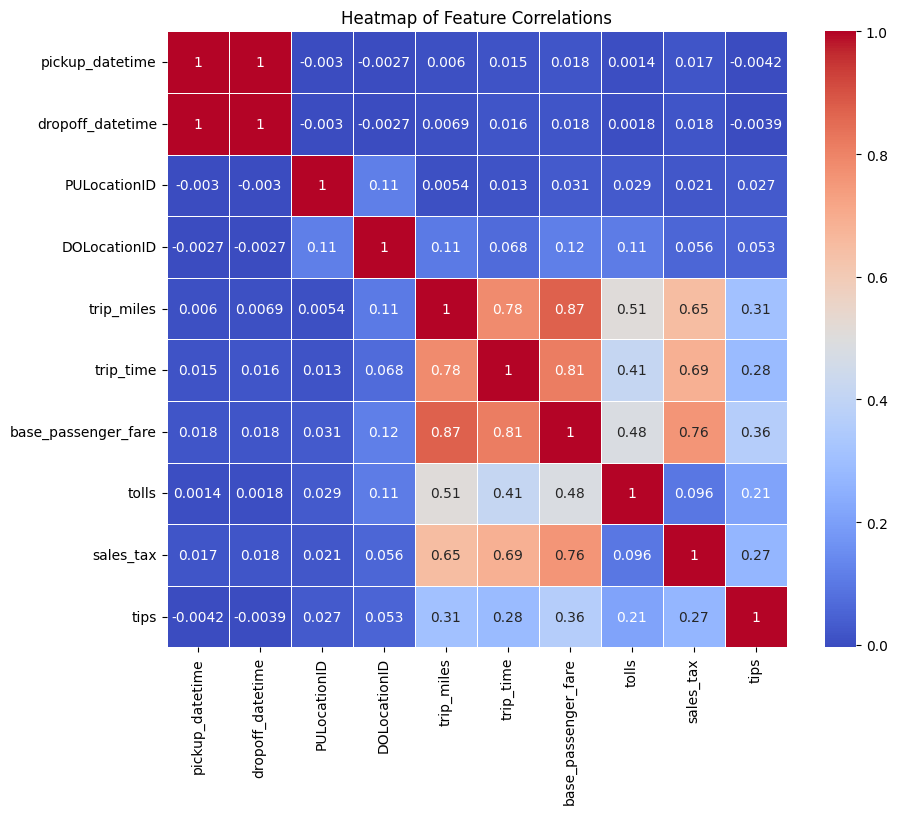

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

### Visualize feature correlation

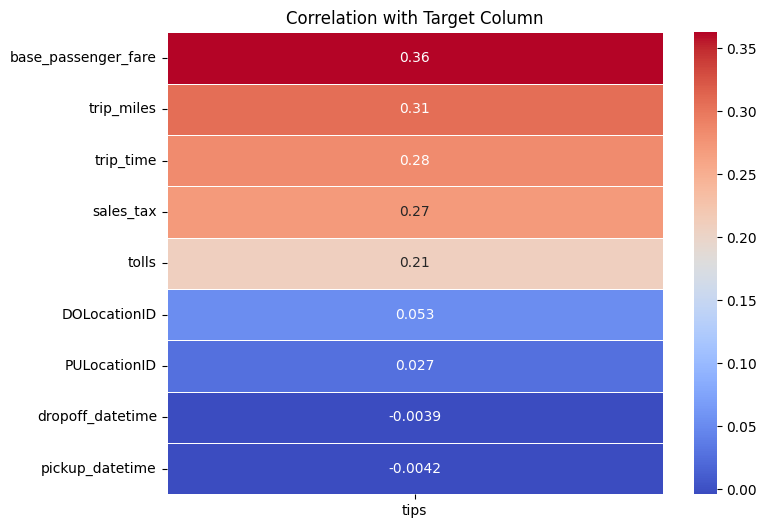

In [6]:
# Extract correlations with the target column
target_corr = corr_matrix[['tips']].drop('tips')
# Sort the correlations
sorted_target_corr = target_corr.sort_values(by='tips', ascending=False)
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(sorted_target_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Target Column')
plt.show()